In [65]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [27]:

outvrt = '/vsimem/mc1.vrt' #/vsimem is special in-memory virtual "directory"
outtif = 'C:/Users/Addie Falcon/L8.tif'
tifs = ['D:\images\LE07\B1.tif',
        'D:\images\LE07\B2.tif',
        'D:\images\LE07\B3.tif',
        'D:\images\LE07\B4.tif',
        'D:\images\LE07\B5.tif',
        'D:\images\LE07\B6_1.tif',
        'D:\images\LE07\B6_2.tif',
        'D:\images\LE07\B7.tif'] 

#or for all tifs in a dir
#import glob
#tifs = glob.glob("")

outds = gdal.BuildVRT(outvrt, tifs, separate=True)
outds = gdal.Translate(outtif, outds)

#checking tif Image
if outtif is not None:
        print("Operation Successful")

Operation Successful


In [73]:
ds=gdal.Open("LE_.tif")

if ds is None: 
    print("Failed to Open")
else:
    print('Successful')



Successful


Enter Vegetation Name: NDSI


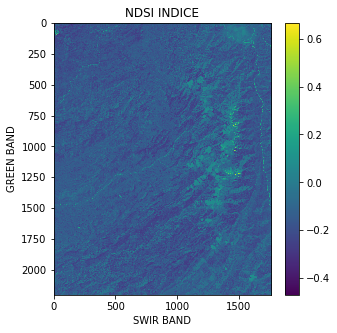

In [119]:
GREEN=ds.GetRasterBand(3).ReadAsArray().astype(np.float32)
RED=ds.GetRasterBand(4).ReadAsArray().astype(np.float32)
NIR=ds.GetRasterBand(5).ReadAsArray().astype(np.float32)
SWIR1=ds.GetRasterBand(6).ReadAsArray().astype(np.float32)
SWIR2=ds.GetRasterBand(7).ReadAsArray().astype(np.float32)


fig=plt.figure(figsize=(5,5))


USER = input("which indice do you want to calculate: ")

if USER =='NDVI' or USER =='ndvi': #Normalized Difference Vegetation Index
    NDVI = (NIR-RED)/(NIR+RED)
    #adding title in mage
    plt.title('Ndvi indice')         
    plt.imshow(NDVI)
    plt.xlabel('RED Band')
    plt.ylabel('NIR Band')
    plt.colorbar()

elif USER == "RVI" or USER =='rvi': #Ratio/simple Vegetation Index 
    RVI = NIR/RED
    plt.title('RVI INDICE')         
    plt.imshow(RVI)
    plt.xlabel('RED Band')
    plt.ylabel('NIR Band')
    plt.colorbar()

elif USER =='NDBI' or USER =='ndbi': #Normalized Difference Built-up Index (NDBI)
    NDBI = (SWIR1 - NIR)/(SWIR1 + NIR)
    plt.title('NDBI INDICE')         
    plt.imshow(NDBI)
    plt.xlabel('NIR Band')
    plt.ylabel('SWIR Band')
    plt.colorbar()

elif USER =='NDWI' or USER =='ndwi': #  Normalized Water Index (NDWI)
    NDWI = (GREEN - NIR)/(GREEN + NIR)
    plt.title('NDWI INDICE')         
    plt.imshow(NDWI)
    plt.xlabel('NIR Band')
    plt.ylabel('GREEN Band')
    plt.colorbar()

elif USER =='GNDVI' or USER =='gndvi': # Green Normalized Difference Vegetation Index (GNDVI)
    GNDVI = (NIR-GREEN)/(NIR+GREEN)
    plt.title('GNDVI INDICE')         
    plt.imshow(GNDVI)
    plt.xlabel('GREEN BAND')
    plt.ylabel('NIR BAND')
    plt.colorbar()
    
elif USER =='NDSI' or USER =='ndsi': # Normalized Difference Snow Index (NDSI)
    NDSI = (GREEN-SWIR1)/(GREEN+SWIR1)
    plt.title('NDSI INDICE')         
    plt.imshow(NDSI)
    plt.xlabel('SWIR BAND')
    plt.ylabel('GREEN BAND')
    plt.colorbar()
else:
    print("Please Enter a Valid Input (NDVI , RVI , NDWI , NDBI , GNDVI,NDSI )")